Построение модели логистической регрессии, настройка гиперпараметров на кросс-валидации, интерпретация коэффициентов.
Цель: В этом домашнем задании вы потренируетесь в настройке модели логистической регрессии, подборе коэффициента регуляризации и интерпретации результатов.
Снова про болезни, на этот раз про рак груди. Нужно научиться предсказывать, является ли клеточное образование злокачественным или нет.

1) Скачайте данные с Kaggle - https://www.kaggle.com/uciml/breast-cancer-wisconsin-data#data.csv

2) Как всегда - базовые статистики, визуализации (распределения, корреляции, pair-plots). В тех графиках, которые это позволяют, раскрасьте значения в зависимости от того, является опухоль злокачественной или нет.

3) Как вы помните, логистическая регрессия плохо относится к линейно-зависимым признакам, во время предобработки, уберите переменные, корреляция пирсона между которыми превышает 0.85. Разбейте данные на train-test, отложив 30% выборки для тестирования. Приведите все непрерывные переменные к одному масштабу при помощи стандартизации.

4) Постройте модель логистической регрессии "из коробки" без настройки параметров. Оцените метрики качества бинарной классификации (accuracy, precision, recall, f1_score), постройте ROC-кривую и посчитайте площадь под ней. Визуализируйте влияние коэффициентов на целевую переменную.

5) Теперь проведите настройку параметра регуляризации C на кросс-валидации (LogisticRegressionCV). Снова оцените результаты и постройте визуализацию влияния коэффициентов на целевую переменную. Сделайте интересные выводы :)

Бонусное задание - постройте также модель KNN с настройкой числа соседей на CV. У какой модели качество оказалось выше?

Критерии оценки: Максимум - 10 баллов.

За качественную предобработку и визуализации - 5 баллов, за настройку и визуализацию коэффициентов моделей - еще 5 баллов.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# in order to display all columns
pd.set_option('display.max_columns', 500)

In [2]:
data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [4]:
data = data.drop(["Unnamed: 32"], axis = 1)

In [5]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
data.describe(include =['object'])

,diagnosis
count,569
unique,2
top,B
freq,357


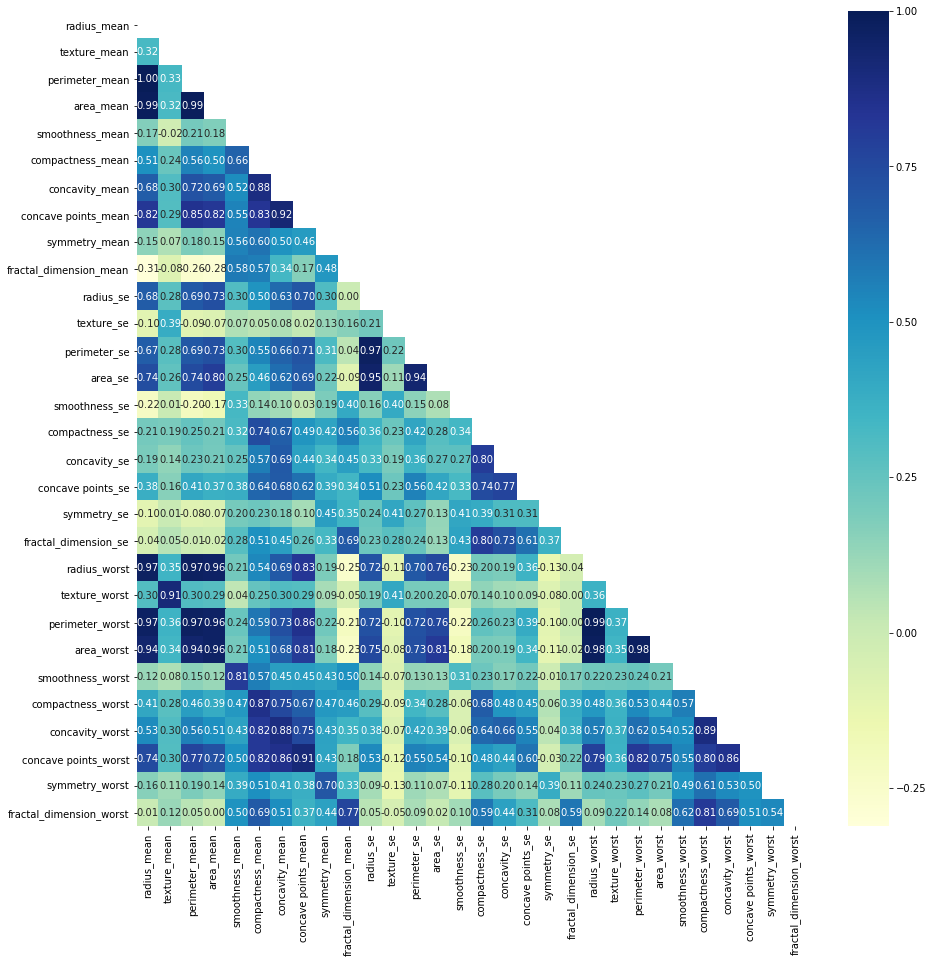

In [7]:
#Correlation matrix
corr_matrix = data.drop('id', axis = 1).corr()
plt.figure(figsize=(15,15));
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix,mask = mask, annot=True, cmap="YlGnBu", fmt='.2f')

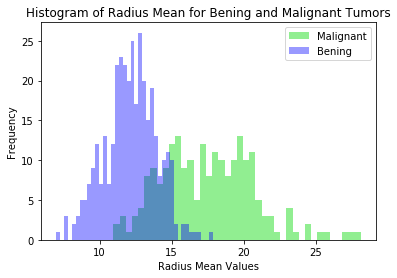

In [8]:
m = plt.hist(data[data["diagnosis"] == "M"].radius_mean, bins=40,label = "Malignant", color = 'lightgreen', alpha = 0.99)
b = plt.hist(data[data["diagnosis"] == "B"].radius_mean, bins=40,label = "Bening", color = 'blue', alpha = 0.4)
plt.legend()
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Radius Mean for Bening and Malignant Tumors")
plt.show()

In [9]:
data[['diagnosis','id']].groupby(by = 'diagnosis').count()

,id
diagnosis,
B,357
M,212


In [10]:
#Теперь сделаем нормализацию, чтобы графики отображались нормально
data_num = data.drop(['id','diagnosis'], axis = 1)
data_norm = (data_num - data_num.mean()) / (data_num.std())  
data_norm['diagnosis'] = data.diagnosis

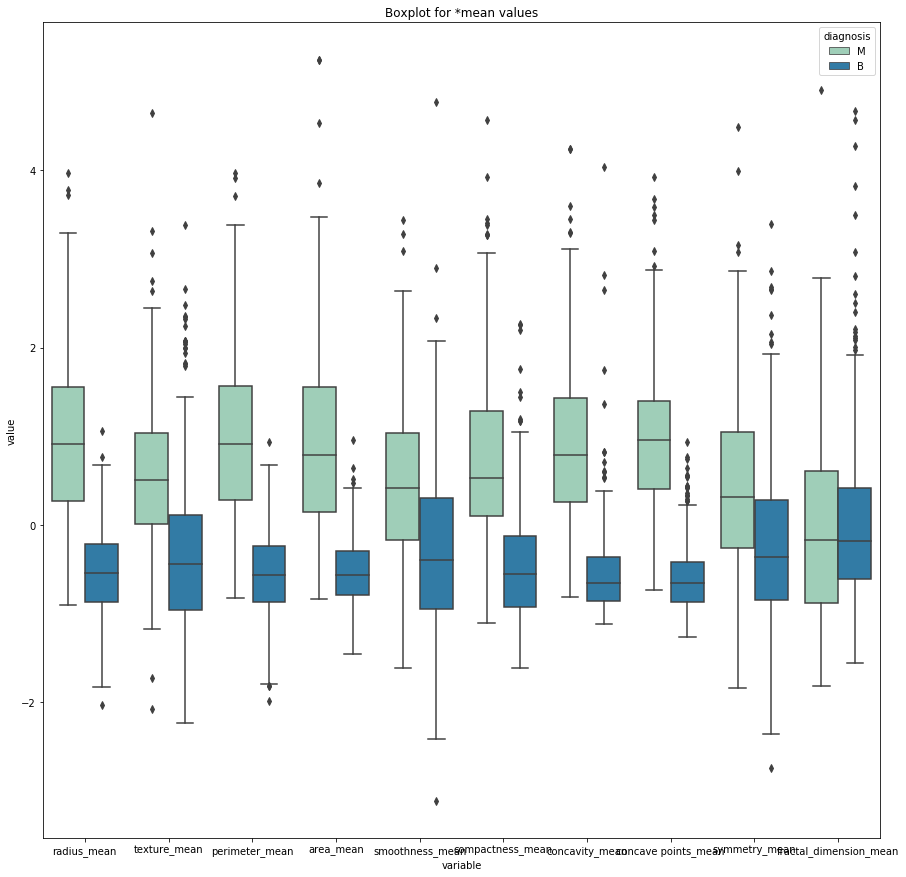

In [11]:
melted_data = pd.melt(data_norm, id_vars = "diagnosis", value_vars = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'])
plt.figure(figsize = (15,15))
plt.title("Boxplot for *mean values")
sns.boxplot(x = "variable", y = "value", hue="diagnosis", data= melted_data, palette = "YlGnBu")
plt.show()

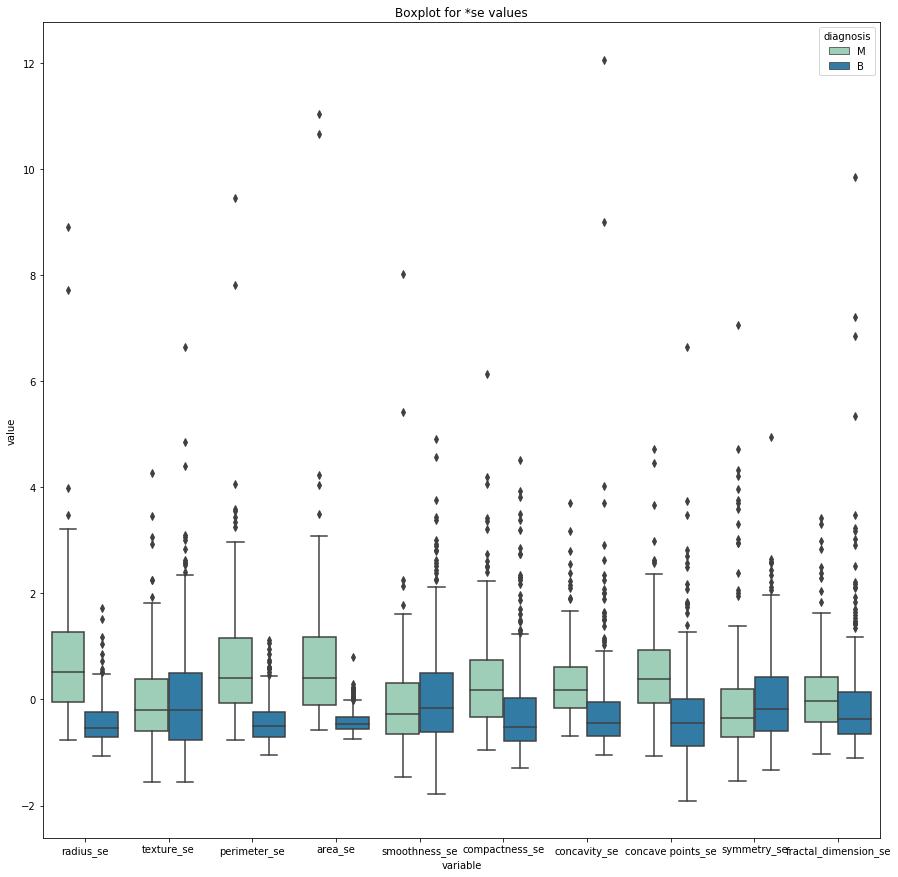

In [12]:
melted_data = pd.melt(data_norm, id_vars = "diagnosis", value_vars = ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se'])
plt.figure(figsize = (15,15))
sns.boxplot(x = "variable", y = "value", hue="diagnosis", data= melted_data, palette = "YlGnBu")
plt.title("Boxplot for *se values")
plt.show()

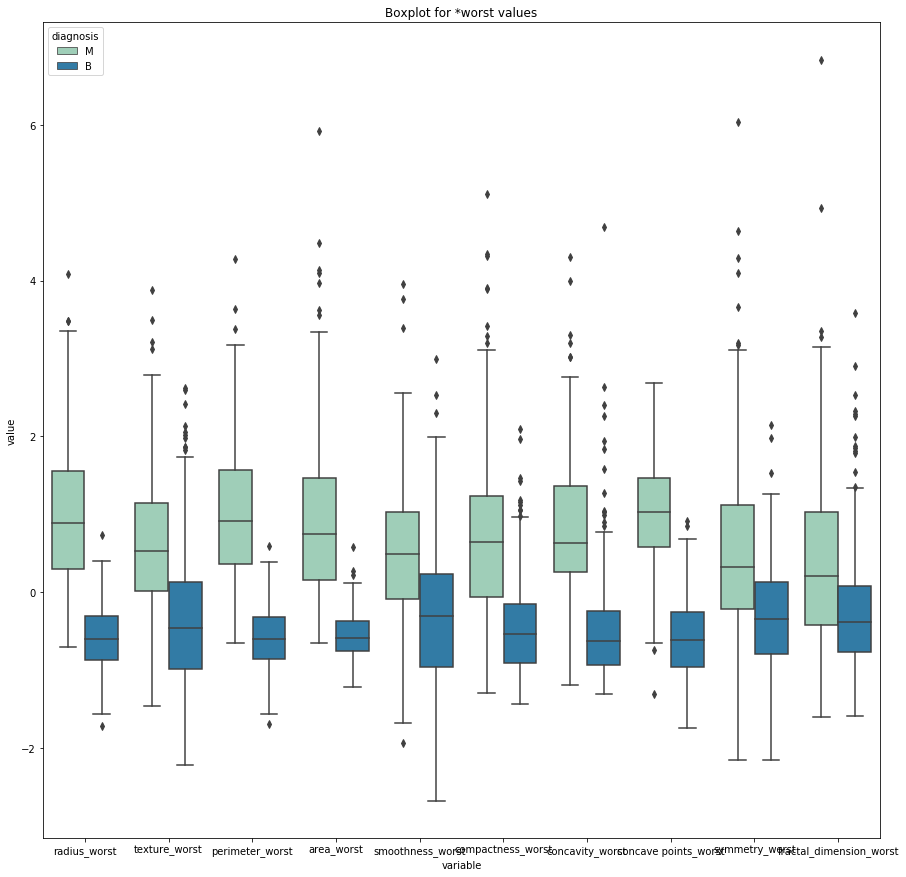

In [13]:
melted_data = pd.melt(data_norm, id_vars = "diagnosis", value_vars = ['radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'])
plt.figure(figsize = (15,15))
sns.boxplot(x = "variable", y = "value", hue="diagnosis", data= melted_data, palette = "YlGnBu")
plt.title("Boxplot for *worst values")
plt.show()


You can see outliers from box plots. For example, I found 3 outlier in "radius_mean" variable. These values lie outside the 1,5 interquartile range (IQR) from the average value of the variable.

The distribution of most variables is clearly different for malignant and benign tumors. I assume that it will be easiest to determine the malignancy and benignity of a tumor by the following variables:

- radius_mean,
- perimeter_mean,
- area_mean,
- compactness_mean,
- concavity_mean,
- concave points_mean,
- radius_se,
- perimeter_se,
- area_se,
- radius_worst,
- texture_worst,
- perimeter_worst,
- area_worst,
- compactness_worst,
- concavity_worst,
- concave points_worst

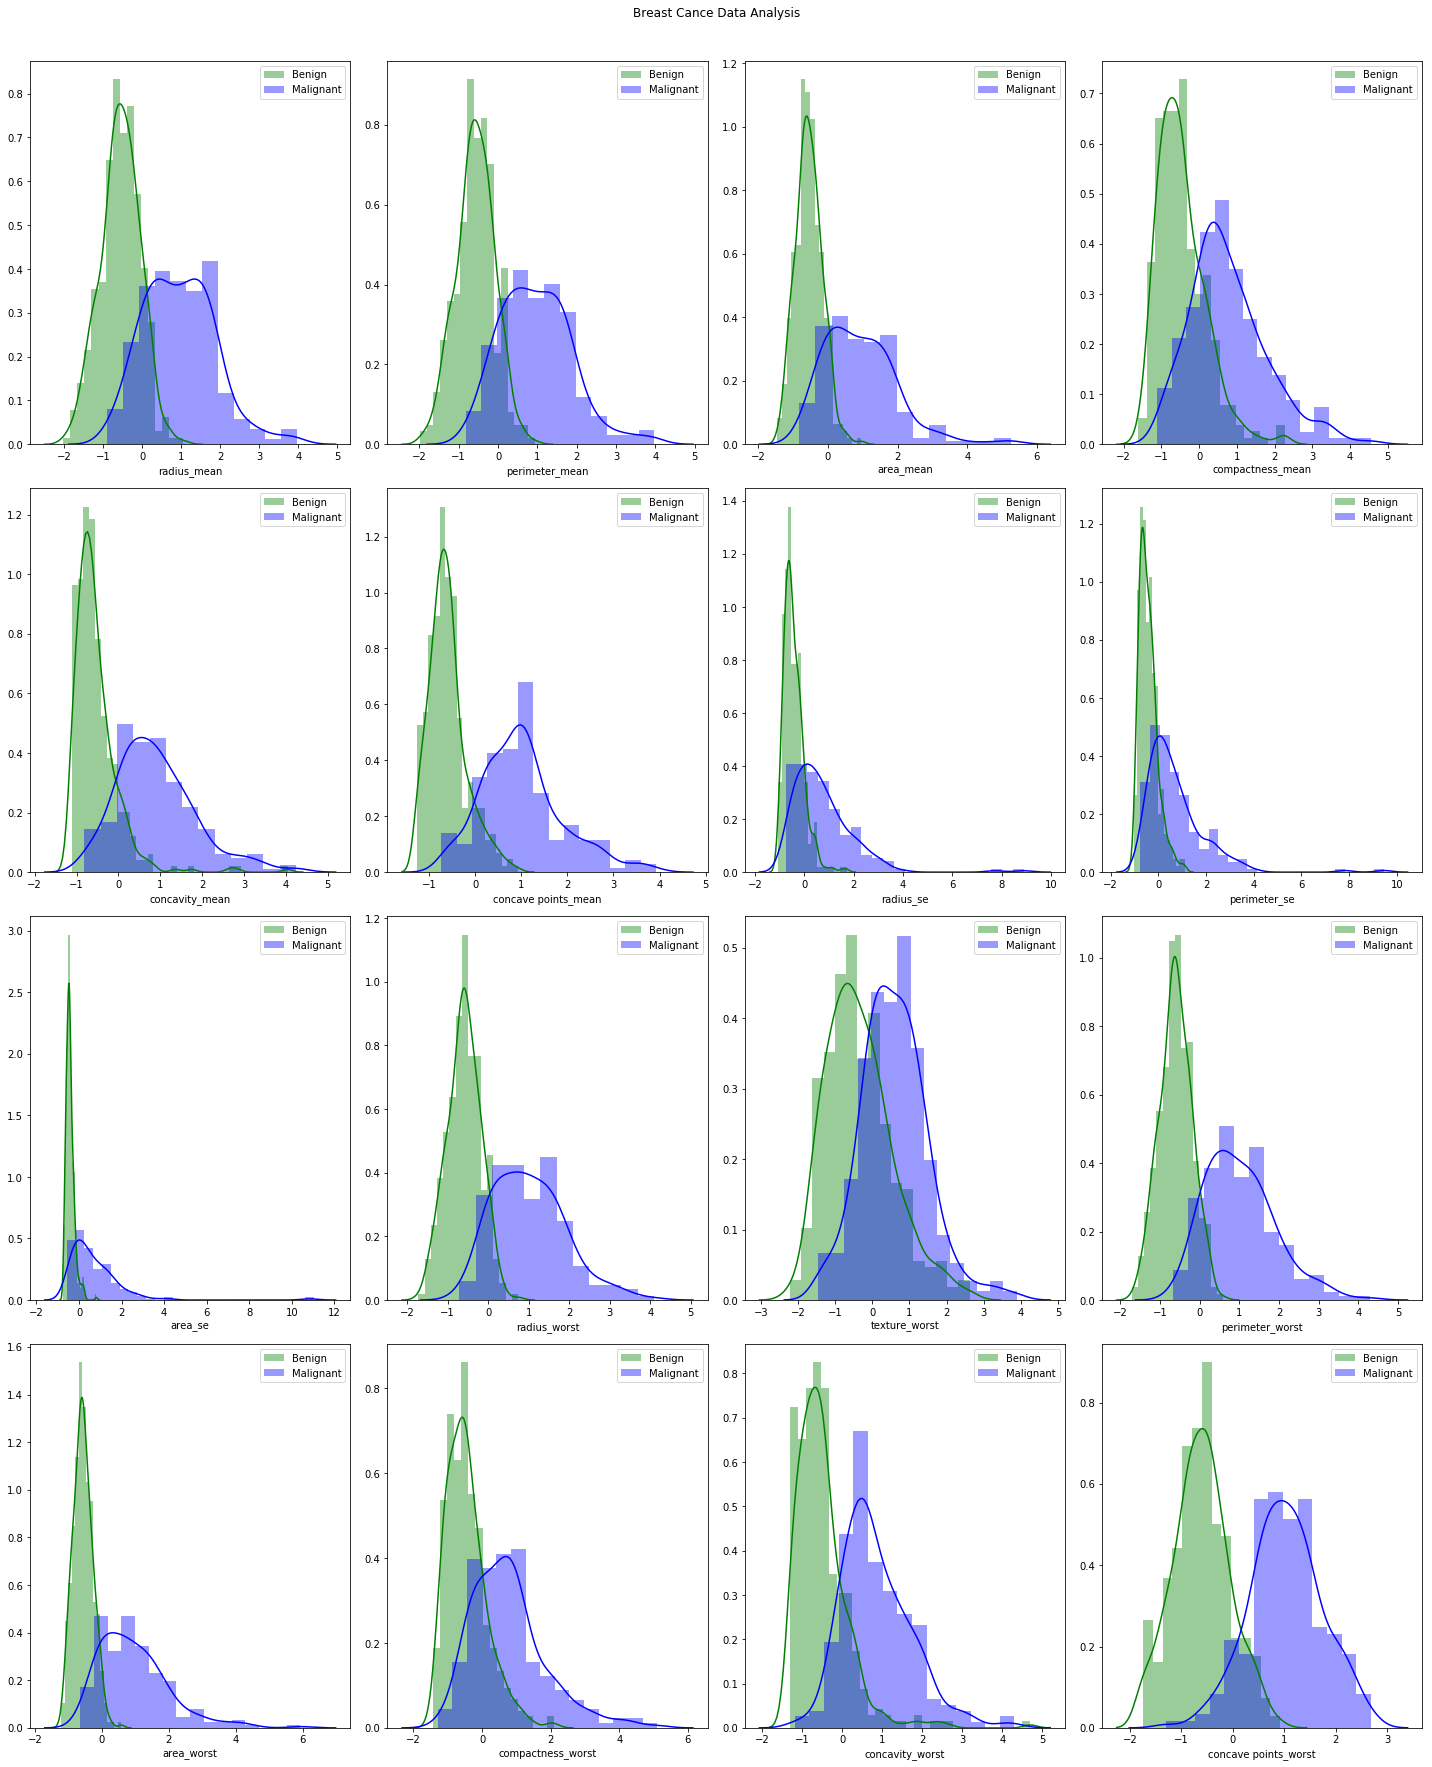

In [14]:

# Distribution of these variables
columns = ['radius_mean','perimeter_mean','area_mean','compactness_mean','concavity_mean',
           'concave points_mean', 'radius_se', 'perimeter_se', 'area_se' , 'radius_worst', 
           'texture_worst', 'perimeter_worst', 'area_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst']
fig = plt.figure(figsize = (20, 25))
j = 0
for i in columns:
    plt.subplot(4, 4, j+1)
    j += 1
    sns.distplot(data_norm[i][data_norm['diagnosis']=='B'], color='green', label = 'Benign')
    sns.distplot(data_norm[i][data_norm['diagnosis']=='M'], color='blue', label = 'Malignant')
    plt.legend(loc='best')
fig.suptitle('Breast Cance Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [15]:
corr_matrix

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [16]:
# Находим пары признаков с корреляцией больше 0.85
CorField = []
# проход по столбцу
for i in corr_matrix:
    #отбор признаков с корреляцией более 0.85
    for j in corr_matrix.index[corr_matrix[i] > 0.85]:
        # добавление в список высокоскореллированных, если признаков в нем еще нет
        if i != j and j not in CorField and i not in CorField:
            CorField.append(j)
            print (i, j, corr_matrix[i][corr_matrix.index == j].values[0])

radius_mean perimeter_mean 0.9978552814938113
radius_mean area_mean 0.9873571700566119
radius_mean radius_worst 0.9695389726112053
radius_mean perimeter_worst 0.9651365139559878
radius_mean area_worst 0.9410824595860459
texture_mean texture_worst 0.9120445888404215
compactness_mean concavity_mean 0.8831206701772499
compactness_mean compactness_worst 0.8658090398022638
concave points_mean concave points_worst 0.9101553142985934
radius_se perimeter_se 0.9727936770160752
radius_se area_se 0.95183011211099


In [17]:
CorField

['perimeter_mean',
 'area_mean',
 'radius_worst',
 'perimeter_worst',
 'area_worst',
 'texture_worst',
 'concavity_mean',
 'compactness_worst',
 'concave points_worst',
 'perimeter_se',
 'area_se']

In [18]:
data_ncorr = data_norm.drop(CorField, axis = 1)
data_ncorr.corr()

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.170581,0.506124,0.822529,0.147741,-0.311631,0.679090,-0.097317,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.119616,0.526911,0.163953,0.007066
texture_mean,0.323782,1.000000,-0.023389,0.236702,0.293464,0.071401,-0.076437,0.275869,0.386358,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.077503,0.301025,0.105008,0.119205
smoothness_mean,0.170581,-0.023389,1.000000,0.659123,0.553695,0.557775,0.584792,0.301467,0.068406,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.805324,0.434926,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.659123,1.000000,0.831135,0.602641,0.565369,0.497473,0.046205,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.565541,0.816275,0.510223,0.687382
concave points_mean,0.822529,0.293464,0.553695,0.831135,1.000000,0.462497,0.166917,0.698050,0.021480,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.452753,0.752399,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.557775,0.602641,0.462497,1.000000,0.479921,0.303379,0.128053,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.426675,0.433721,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,0.584792,0.565369,0.166917,0.479921,1.000000,0.000111,0.164174,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,0.504942,0.346234,0.334019,0.767297
radius_se,0.679090,0.275869,0.301467,0.497473,0.698050,0.303379,0.000111,1.000000,0.213247,0.164514,0.356065,0.332358,0.513346,0.240567,0.227754,0.141919,0.380585,0.094543,0.049559
texture_se,-0.097317,0.386358,0.068406,0.046205,0.021480,0.128053,0.164174,0.213247,1.000000,0.397243,0.231700,0.194998,0.230283,0.411621,0.279723,-0.073658,-0.068956,-0.128215,-0.045655
smoothness_se,-0.222600,0.006614,0.332375,0.135299,0.027653,0.187321,0.401964,0.164514,0.397243,1.000000,0.336696,0.268685,0.328429,0.413506,0.427374,0.314457,-0.058298,-0.107342,0.101480


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

In [20]:
data_ncorr.columns

Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'concavity_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis'],
      dtype='object')

In [21]:
data['diagnosis'] = np.where(data['diagnosis']=='M', 1, 0)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data_ncorr.drop(['diagnosis'], axis = 1), 
                                                    data['diagnosis'], test_size=0.3, random_state=42)

In [23]:
def quality_report(prediction, actual):
    print("Accuracy: {:.3f}\nPrecision: {:.3f}\nRecall: {:.3f}\nf1_score: {:.3f}".format(
        accuracy_score(prediction, actual),
        precision_score(prediction, actual),
        recall_score(prediction, actual),
        f1_score(prediction, actual)
    ))

In [24]:
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)
print("Train quality:")
quality_report(log_reg.predict(X_train), y_train)
print("\nTest quality:")
quality_report(log_reg.predict(X_test), y_test)

Train quality:
Accuracy: 0.987
Precision: 0.966
Recall: 1.000
f1_score: 0.983

Test quality:
Accuracy: 0.982
Precision: 0.984
Recall: 0.969
f1_score: 0.976


D:\programs\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


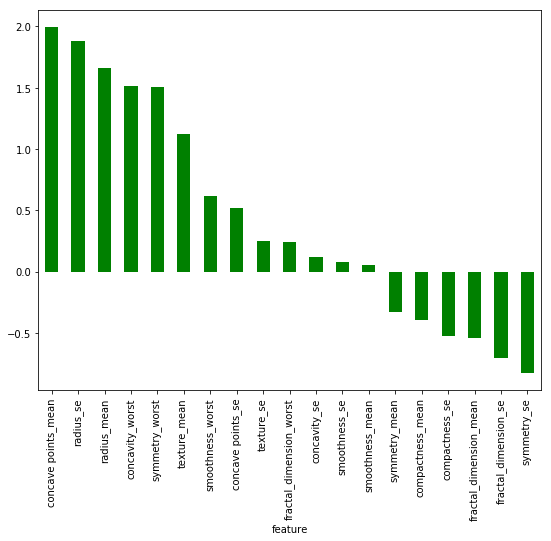

In [25]:
featureImportance = pd.DataFrame({"feature": data_ncorr.drop('diagnosis',axis=1).columns, 
                                  "importance": log_reg.coef_[0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(9, 7), color='green');

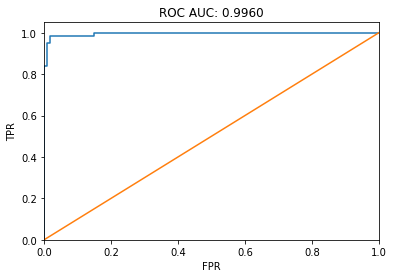

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
auc_score = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1])
    
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC AUC: {:.4f}'.format(auc_score))
plt.show()

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
param_grid = {'Cs': [1, 3, 5, 10, 15, 25, 100], 
             'solver': ['liblinear'], 
             'penalty': ['l2'], 
             'cv': [3,4,5,6,7,8,9,10],
             'random_state': [42]}
log_reg_cv = LogisticRegressionCV()
log_reg_cv_model = GridSearchCV(log_reg_cv, param_grid)

log_reg_cv_model.fit(X_train, y_train)   
print('_'*50)
print("Best model " + str(log_reg_cv_model.best_params_))
print("Train quality:")
quality_report(log_reg_cv_model.predict(X_train), y_train)
print("\nTest quality:")
quality_report(log_reg_cv_model.predict(X_test), y_test)
print('_'*50)

D:\programs\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


__________________________________________________
Best model {'Cs': 15, 'cv': 4, 'penalty': 'l2', 'random_state': 42, 'solver': 'liblinear'}
Train quality:
Accuracy: 0.987
Precision: 0.966
Recall: 1.000
f1_score: 0.983

Test quality:
Accuracy: 0.982
Precision: 0.984
Recall: 0.969
f1_score: 0.976
__________________________________________________


In [29]:
log_reg_cv_best = LogisticRegressionCV(
    penalty='l2',
    solver = 'liblinear', 
    random_state = 42, 
    cv = 4, 
    Cs = 15
    )
log_reg_cv_best.fit(X_train, y_train)
print(log_reg_cv_best.coef_)

[[ 1.65704314  1.12426977  0.05079253 -0.39757525  1.99380999 -0.32563477
  -0.53713718  1.8840828   0.24895593  0.078443   -0.52548529  0.11767982
   0.51985789 -0.82743885 -0.70692625  0.61368384  1.51532616  1.50565012
   0.24455782]]


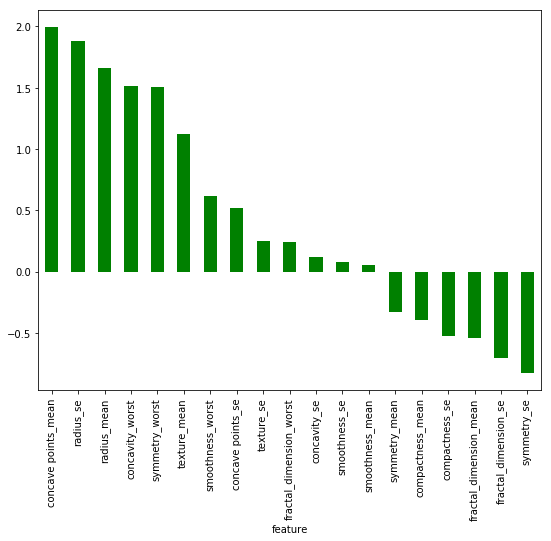

In [30]:
featureImportance = pd.DataFrame({"feature": data_ncorr.drop('diagnosis',axis=1).columns, 
                                  "importance": log_reg_cv_best.coef_[0]})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar', figsize=(9, 7), color='green');

Логистическая регрессия с использование кросс-валлидации не оказала эффекта на качество предсказаний даже с учетом подбора параметров по сетке. Важность коэффициентов осталась на том же уровне, что и до. Feature Importance совершенно не поменялась.

Качество на тесте без настройки параметров: 

    Test quality:
    Accuracy: 0.982
    Precision: 0.984
    Recall: 0.969
    f1_score: 0.976
    
    
Качество на тесте после настройки параметров: 

    Test quality:
    Accuracy: 0.982
    Precision: 0.984
    Recall: 0.969
    f1_score: 0.976


Полагаю, что для данной модели использование сложных надстроек попросту бесполезно.

Бонусное задание - постройте также модель KNN с настройкой числа соседей на CV. У какой модели качество оказалось выше?

In [33]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': range(1,20)}

knn = KNeighborsClassifier()
knn_model = GridSearchCV(knn, param_grid, cv = 5)
knn_model.fit(X_train, y_train)
  
print('_'*50)
print("Best model " + str(knn_model.best_params_))
print("Train quality:")
quality_report(knn_model.predict(X_train), y_train)
print("\nTest quality:")
quality_report(knn_model.predict(X_test), y_test)
print('_'*50)

__________________________________________________
Best model {'n_neighbors': 7}
Train quality:
Accuracy: 0.975
Precision: 0.933
Recall: 1.000
f1_score: 0.965

Test quality:
Accuracy: 0.947
Precision: 0.921
Recall: 0.935
f1_score: 0.928
__________________________________________________


D:\programs\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Линейная регрессия улавливает взаимосвязи  делает предсказания немного лучше, чем алгоритм классификации K ближайших соседей